## Final COVID_19 Risk Infection Analysis 

### Library import

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### KDD Process
1. Dataset load and features semantics
1. Data Cleaning (handle missing values, remove useless variables)
1. Feature Engineering
1. Classification Preprocessing (feature reshaping, train/test partitioning)
1. Parameter Tuning
1. Perform Classification
1. Analyze the classification results
1. Analyze the classification performance
1. Can we improve the performance using another classifier?

In [2]:
# Getting the dataset
df = pd.read_csv("master_dataset.csv")

In [3]:
df.head()

,region,country,sex,age,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,...,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,NaN,CA,male,20_30,27.7,bn,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,9.0,0.500
1,NaN,CA,male,80_90,27.7,an,NaN,NaN,NaN,NaN,...,1,1,0,1,0,NaN,NaN,NaN,9.0,64.824
2,NaN,CA,female,30_40,21.6,unknown,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,9.0,0.500
3,NaN,CA,male,60_70,32.4,unknown,NaN,NaN,NaN,NaN,...,0,1,0,1,0,NaN,NaN,NaN,9.0,21.658
4,NaN,CA,female,50_60,29.7,unknown,NaN,NaN,NaN,NaN,...,0,0,0,0,1,NaN,NaN,NaN,9.0,12.061


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682793 entries, 0 to 682792
Data columns (total 37 columns):
region                       72575 non-null object
country                      682774 non-null object
sex                          682793 non-null object
age                          682793 non-null object
bmi                          682793 non-null float64
blood_type                   682793 non-null object
smoking                      680940 non-null object
alcohol                      680940 non-null float64
cannabis                     669293 non-null float64
amphetamines                 652870 non-null float64
cocaine                      651007 non-null float64
lsd                          655151 non-null float64
mdma                         659180 non-null float64
contacts_count               678561 non-null float64
house_count                  682793 non-null int64
text_working                 678561 non-null object
rate_government_action       682793 non-null int64


In [5]:
df.describe(include='all')

,region,country,sex,age,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,...,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
count,72575,682774,682793,682793,682793.000000,682793,680940,680940.000000,669293.000000,652870.000000,...,682793.000000,682793.000000,682793.000000,682793.000000,682793.000000,210009,562221.000000,562221.000000,682790.000000,682790.000000
unique,5,176,3,11,NaN,9,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60827,NaN,NaN,NaN,NaN
top,SA,US,female,30_40,NaN,unknown,never,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,LEVOTHYROXINE SODIUM,NaN,NaN,NaN,NaN
freq,29919,573247,467721,219007,NaN,224051,387680,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11030,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,29.830236,NaN,NaN,2.731708,2.405111,-0.720591,...,0.012581,0.059639,0.003232,0.129749,0.074556,NaN,36.329139,21.301348,55.674408,3.646769
std,NaN,NaN,NaN,NaN,7.967037,NaN,NaN,4.198964,8.104987,1.957915,...,0.111456,0.236817,0.056762,0.336028,0.262673,NaN,22.195624,21.752944,24.140232,6.993820
min,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,-1.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,5.000000,5.000000,9.000000,0.500000
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,0.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,15.000000,5.000000,36.000000,0.500000
50%,NaN,NaN,NaN,NaN,28.300000,NaN,NaN,1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,35.000000,15.000000,50.000000,0.500000
75%,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,4.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,55.000000,35.000000,75.000000,2.329000


### Data cleaning

In [6]:
df.isnull().sum()

region                       610218
country                          19
sex                               0
age                               0
bmi                               0
blood_type                        0
smoking                        1853
alcohol                        1853
cannabis                      13500
amphetamines                  29923
cocaine                       31786
lsd                           27642
mdma                          23613
contacts_count                 4232
house_count                       0
text_working                   4232
rate_government_action            0
rate_reducing_risk_single         0
rate_reducing_risk_house          0
rate_reducing_mask             1853
covid19_positive                  0
covid19_symptoms                  0
covid19_contact                   0
asthma                            0
kidney_disease                    0
compromised_immune                0
heart_disease                     0
lung_disease                

In [7]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['smoking'] = df['smoking'].fillna(df['smoking'].mode()[0])

df['text_working'] = df['text_working'].fillna(df['text_working'].mode()[0])

# Filling Missing observations in Continuous variables in the dataset:
df['rate_reducing_mask'].fillna(df['rate_reducing_mask'].mean(), inplace=True)
#df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df['alcohol'].fillna(df['alcohol'].mean(), inplace=True)
df['cannabis'].fillna(df['cannabis'].mean(), inplace=True)
df['amphetamines'].fillna(df['amphetamines'].mean(), inplace=True)
df['lsd'].fillna(df['lsd'].mean(), inplace=True)
df['mdma'].fillna(df['mdma'].mean(), inplace=True)
df['cocaine'].fillna(df['cocaine'].mean(), inplace=True)
df['contacts_count'].fillna(df['contacts_count'].mean(), inplace=True)
df['lung_disease'].fillna(df['lung_disease'].mean(), inplace=True)
df['diabetes'].fillna(df['diabetes'].mean(), inplace=True)
df['hiv_positive'].fillna(df['hiv_positive'].mean(), inplace=True)
df['hypertension'].fillna(df['hypertension'].mean(), inplace=True)
df['other_chronic'].fillna(df['other_chronic'].mean(), inplace=True)
df['opinion_infection'].fillna(df['opinion_infection'].mean(), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

df['opinion_mortality'].fillna(df['opinion_mortality'].mean(), inplace=True)
df['risk_infection'].fillna(df['risk_infection'].mean(), inplace=True)
df['risk_mortality'].fillna(df['risk_mortality'].mean(), inplace=True)
df['heart_disease'].fillna(df['heart_disease'].mean(), inplace=True)

In [8]:
df.columns

Index(['region', 'country', 'sex', 'age', 'bmi', 'blood_type', 'smoking',
       'alcohol', 'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma',
       'contacts_count', 'house_count', 'text_working',
       'rate_government_action', 'rate_reducing_risk_single',
       'rate_reducing_risk_house', 'rate_reducing_mask', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes',
       'hiv_positive', 'hypertension', 'other_chronic',
       'prescription_medication', 'opinion_infection', 'opinion_mortality',
       'risk_infection', 'risk_mortality'],
      dtype='object')

In [9]:
column2drop = ['region', 'prescription_medication', 'opinion_mortality', 'risk_mortality']
df.drop(column2drop, axis=1, inplace=True)

In [10]:
df.head()

,country,sex,age,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,...,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,risk_infection
0,CA,male,20_30,27.7,bn,never,2.731708,2.405111,-0.720591,-0.795096,...,0,0,0,0,0,0,0,0,36.329139,9.0
1,CA,male,80_90,27.7,an,never,2.731708,2.405111,-0.720591,-0.795096,...,0,1,0,1,1,0,1,0,36.329139,9.0
2,CA,female,30_40,21.6,unknown,never,2.731708,2.405111,-0.720591,-0.795096,...,0,0,0,0,0,0,0,0,36.329139,9.0
3,CA,male,60_70,32.4,unknown,never,2.731708,2.405111,-0.720591,-0.795096,...,0,0,0,0,1,0,1,0,36.329139,9.0
4,CA,female,50_60,29.7,unknown,never,2.731708,2.405111,-0.720591,-0.795096,...,0,1,0,0,0,0,0,1,36.329139,9.0


### Feature Engineering

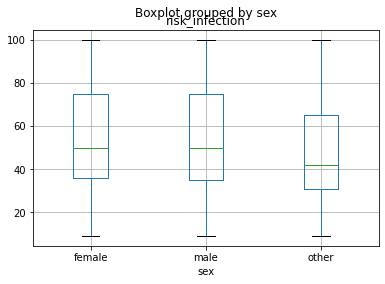

In [11]:
df.boxplot(['risk_infection'], by='sex', showfliers=True)
plt.show()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


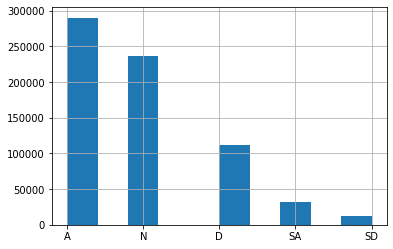

In [12]:
df.rate_government_action[df.rate_government_action == -2] = "SD"
df.rate_government_action[df.rate_government_action == -1] = "D"
df.rate_government_action[df.rate_government_action == 0] = "N"
df.rate_government_action[df.rate_government_action == 1] = "A"
df.rate_government_action[df.rate_government_action == 2] = "SA"

df["rate_government_action"].hist()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

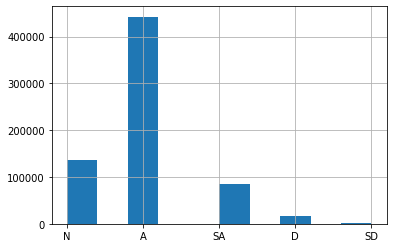

In [13]:
df.rate_reducing_risk_house[df.rate_reducing_risk_house == -2] = "SD"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == -1] = "D"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == 0] = "N"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == 1] = "A"
df.rate_reducing_risk_house[df.rate_reducing_risk_house == 2] = "SA"
df["rate_reducing_risk_house"].hist()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


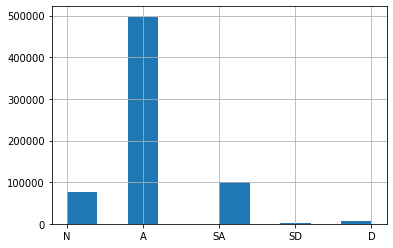

In [14]:
df.rate_reducing_risk_single[df.rate_reducing_risk_single == -2] = "SD"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == -1] = "D"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == 0] = "N"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == 1] = "A"
df.rate_reducing_risk_single[df.rate_reducing_risk_single == 2] = "SA"
df["rate_reducing_risk_single"].hist()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682793 entries, 0 to 682792
Data columns (total 33 columns):
country                      682793 non-null object
sex                          682793 non-null object
age                          682793 non-null object
bmi                          682793 non-null float64
blood_type                   682793 non-null object
smoking                      682793 non-null object
alcohol                      682793 non-null float64
cannabis                     682793 non-null float64
amphetamines                 682793 non-null float64
cocaine                      682793 non-null float64
lsd                          682793 non-null float64
mdma                         682793 non-null float64
contacts_count               682793 non-null float64
house_count                  682793 non-null int64
text_working                 682793 non-null object
rate_government_action       682793 non-null object
rate_reducing_risk_single    682793 non-null objec

### Classification Preprocessing

Feature Reshaping

In [16]:
#df['risk_infection'] = pd.cut(df.risk_infection,bins=[0,34,67,100],labels=['Low','Medium','High'])
#df['risk_infection']

In [17]:
#df['bmi'] = pd.cut(df.bmi,bins=[0,18.5,24.9,29.9,39.9,145],labels=['Underweight','Healthy weight','Overweight','Obese',
                                                                 #'Class 3 Obese'])
#df['bmi']

In [18]:
#df['bmi'].value_counts()
#df['bmi'].value_counts()
#df['bmi'].value_counts()
#df['bmi'].value_counts()
#df['bmi'].value_counts().plot(kind='bar', 
                                   #title='BMI Distribution')
#plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
df[['cannabis', 'cocaine', 'amphetamines', 'lsd', 'mdma']] = StandardScaler().fit_transform(df[['cannabis', 'cocaine', 'amphetamines', 'lsd', 'mdma']])

In [20]:
col = df.loc[: , 'cannabis':'mdma']
df['drugs_use'] = col.mean(axis=1)

In [21]:
column3drop = ['cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma']
df.drop(column3drop, axis=1, inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
label_encoders = dict()
column2encode = ['sex', 'age', 'country','blood_type', 'smoking', 
                'text_working', 'rate_government_action', 'rate_reducing_risk_single', 
                'rate_reducing_risk_house']#'risk_infection']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [24]:
df.isnull().sum()

country                      0
sex                          0
age                          0
bmi                          0
blood_type                   0
smoking                      0
alcohol                      0
contacts_count               0
house_count                  0
text_working                 0
rate_government_action       0
rate_reducing_risk_single    0
rate_reducing_risk_house     0
rate_reducing_mask           0
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_positive                 0
hypertension                 0
other_chronic                0
opinion_infection            0
risk_infection               0
drugs_use                    0
dtype: int64

Train/Test partitioning

In [25]:
df.columns

Index(['country', 'sex', 'age', 'bmi', 'blood_type', 'smoking', 'alcohol',
       'contacts_count', 'house_count', 'text_working',
       'rate_government_action', 'rate_reducing_risk_single',
       'rate_reducing_risk_house', 'rate_reducing_mask', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes',
       'hiv_positive', 'hypertension', 'other_chronic', 'opinion_infection',
       'risk_infection', 'drugs_use'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682793 entries, 0 to 682792
Data columns (total 29 columns):
country                      682793 non-null int32
sex                          682793 non-null int32
age                          682793 non-null int32
bmi                          682793 non-null float64
blood_type                   682793 non-null int32
smoking                      682793 non-null int32
alcohol                      682793 non-null float64
contacts_count               682793 non-null float64
house_count                  682793 non-null int64
text_working                 682793 non-null int32
rate_government_action       682793 non-null int32
rate_reducing_risk_single    682793 non-null int32
rate_reducing_risk_house     682793 non-null int32
rate_reducing_mask           682793 non-null float64
covid19_positive             682793 non-null int64
covid19_symptoms             682793 non-null int64
covid19_contact              682793 non-null int64
asthma        

In [27]:
activity_variables = df[['risk_infection','country', 'text_working', 'rate_government_action']]

In [28]:
corr_activitity = activity_variables.corr()

In [29]:
activity_variables.corr()

,risk_infection,country,text_working,rate_government_action
risk_infection,1.000000,0.089782,0.513821,0.004297
country,0.089782,1.000000,0.049032,0.055245
text_working,0.513821,0.049032,1.000000,0.007032
rate_government_action,0.004297,0.055245,0.007032,1.000000


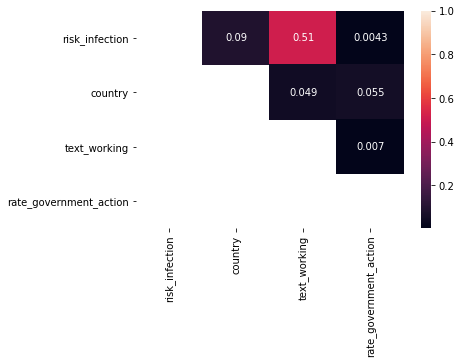

In [30]:
# Correlation matrix
import seaborn as sns

mask = np.tril(activity_variables.corr())
sns.heatmap(activity_variables.corr(), annot=True, mask=mask)
plt.show()

In [31]:
activity_variables = df[['risk_infection','country', 'text_working', 'rate_government_action']]

In [32]:
behaviorial_variables = df[['risk_infection', 'smoking', 'opinion_infection', 'drugs_use']]

In [33]:
behaviorial_variables.corr()

,risk_infection,smoking,opinion_infection,drugs_use
risk_infection,1.000000,0.084613,0.202818,0.032567
smoking,0.084613,1.000000,0.005199,0.254986
opinion_infection,0.202818,0.005199,1.000000,0.028024
drugs_use,0.032567,0.254986,0.028024,1.000000


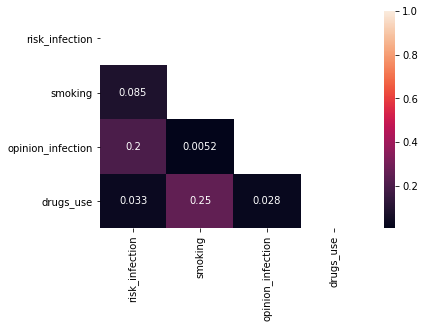

In [34]:
# Correlation matrix
import seaborn as sns

matrix = np.triu(behaviorial_variables.corr())
sns.heatmap(behaviorial_variables.corr(), annot=True, mask=matrix)
plt.show()

In [35]:
medical_variables = df[['risk_infection','compromised_immune', 'heart_disease', 'lung_disease', 'diabetes', 
                       'asthma', 'other_chronic', 'bmi']]

In [36]:
medical_variables.corr()

,risk_infection,compromised_immune,heart_disease,lung_disease,diabetes,asthma,other_chronic,bmi
risk_infection,1.000000,-0.022067,-0.025313,-0.023167,-0.019124,0.002455,-0.026818,0.058807
compromised_immune,-0.022067,1.000000,0.065741,0.090140,0.068418,0.092573,0.261642,0.042311
heart_disease,-0.025313,0.065741,1.000000,0.137331,0.136151,0.008949,0.059580,0.030982
lung_disease,-0.023167,0.090140,0.137331,1.000000,0.064738,0.064592,0.072416,0.016830
diabetes,-0.019124,0.068418,0.136151,0.064738,1.000000,0.024193,0.067054,0.165951
asthma,0.002455,0.092573,0.008949,0.064592,0.024193,1.000000,0.085436,0.086720
other_chronic,-0.026818,0.261642,0.059580,0.072416,0.067054,0.085436,1.000000,0.049428
bmi,0.058807,0.042311,0.030982,0.016830,0.165951,0.086720,0.049428,1.000000


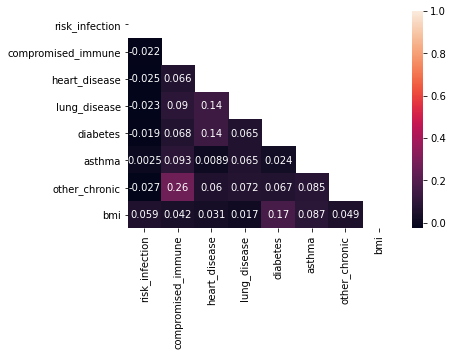

In [37]:
# Correlation matrix
import seaborn as sns

matrix = np.triu(medical_variables.corr())
sns.heatmap(medical_variables.corr(), annot=True, mask=matrix)
plt.show()

In [38]:
#risk_infection = pd.cut(df.risk_infection,bins=[0,34,67,100],labels=['Low','Medium','High'])
#df['risk_infection']
behaviorial_variables = df[['risk_infection','age', 'alcohol','rate_reducing_mask']]

In [39]:
behaviorial_variables.corr()

,risk_infection,age,alcohol,rate_reducing_mask
risk_infection,1.000000,-0.171713,-0.017432,-0.216631
age,-0.171713,1.000000,0.083604,0.143761
alcohol,-0.017432,0.083604,1.000000,-0.035020
rate_reducing_mask,-0.216631,0.143761,-0.035020,1.000000


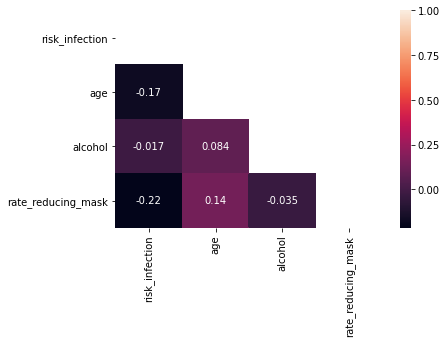

In [40]:
# Correlation matrix
import seaborn as sns

matrix = np.triu(behaviorial_variables.corr())
sns.heatmap(behaviorial_variables.corr(), annot=True, mask=matrix)
plt.show()

In [41]:
corr_matrix = df.corr()
corr_matrix

,country,sex,age,bmi,blood_type,smoking,alcohol,contacts_count,house_count,text_working,...,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,risk_infection,drugs_use
country,1.000000,-0.106909,0.010385,0.114643,0.025826,0.003319,-0.030121,0.060862,0.046794,0.049032,...,0.026072,0.001049,0.008144,0.025649,-0.007993,0.041972,0.008563,0.006023,0.089782,-0.005052
sex,-0.106909,1.000000,0.029062,-0.059576,0.067987,0.028911,0.095892,-0.002939,-0.050981,0.065819,...,-0.073514,0.059130,0.009140,0.037656,0.063458,0.071639,-0.061887,-0.053303,-0.008846,0.080340
age,0.010385,0.029062,1.000000,0.058728,-0.068541,0.002841,0.083604,-0.135784,-0.145832,-0.125929,...,0.044865,0.168809,0.136539,0.179244,0.015337,0.275354,0.067376,-0.044649,-0.171713,-0.063210
bmi,0.114643,-0.059576,0.058728,1.000000,-0.012454,0.010302,-0.123119,0.050852,0.032166,0.024664,...,0.042311,0.030982,0.016830,0.165951,-0.006711,0.209605,0.049428,0.026861,0.058807,-0.031625
blood_type,0.025826,0.067987,-0.068541,-0.012454,1.000000,0.022174,-0.001436,-0.006550,-0.029405,0.016662,...,-0.011585,-0.001482,-0.002656,0.001784,0.009658,-0.010037,-0.015145,-0.017150,-0.004268,0.030992
smoking,0.003319,0.028911,0.002841,0.010302,0.022174,1.000000,0.077528,0.069419,0.038526,0.045813,...,0.029705,0.025949,0.081725,0.011131,0.018918,0.010244,0.024900,0.005199,0.084613,0.254986
alcohol,-0.030121,0.095892,0.083604,-0.123119,-0.001436,0.077528,1.000000,-0.008306,-0.058569,0.017664,...,-0.049196,-0.012047,-0.012597,-0.069631,0.010522,-0.006415,-0.052631,0.024297,-0.017432,0.130544
contacts_count,0.060862,-0.002939,-0.135784,0.050852,-0.006550,0.069419,-0.008306,1.000000,0.200269,0.478599,...,-0.022659,-0.022518,-0.019735,-0.016086,-0.005705,-0.012848,-0.023799,0.207604,0.888682,0.030800
house_count,0.046794,-0.050981,-0.145832,0.032166,-0.029405,0.038526,-0.058569,0.200269,1.000000,0.015945,...,-0.002858,-0.019840,-0.018109,-0.017593,-0.020879,-0.038415,-0.012705,0.009266,0.335922,0.005444
text_working,0.049032,0.065819,-0.125929,0.024664,0.016662,0.045813,0.017664,0.478599,0.015945,1.000000,...,-0.055732,-0.041431,-0.044845,-0.030699,-0.002902,-0.026803,-0.068648,0.141017,0.513821,0.017114


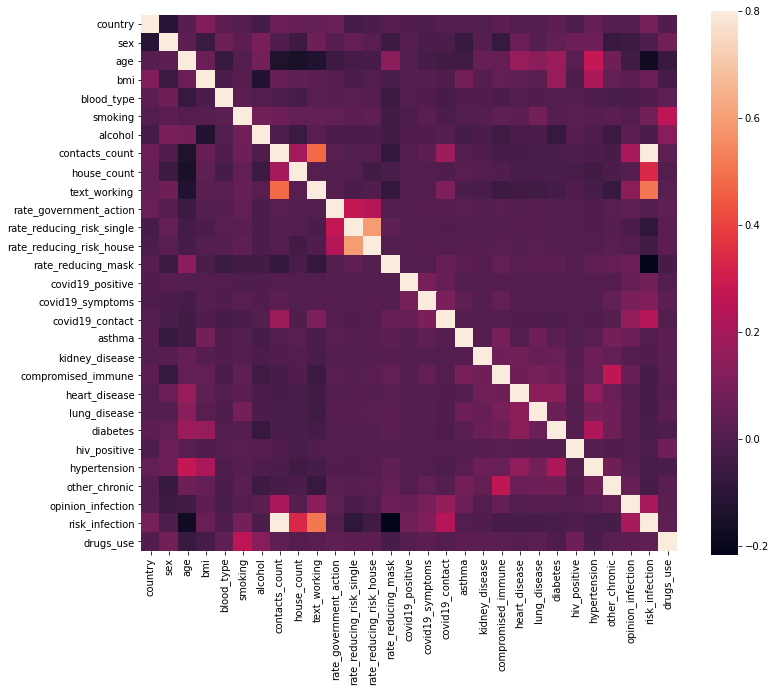

In [42]:
# Correlation matrix
import seaborn as sns

cor = df.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(cor,vmax = 0.8, square = True)
plt.show()

In [43]:
 independent_variables = df[['country', 'age', 'bmi', 'blood_type', 'smoking', 
       'contacts_count', 'house_count', 'rate_reducing_risk_house', 'rate_reducing_mask',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'compromised_immune', 'diabetes',
       'hypertension', 'opinion_infection','drugs_use', 'risk_infection']]

In [44]:
corr_matrix =  independent_variables.corr()

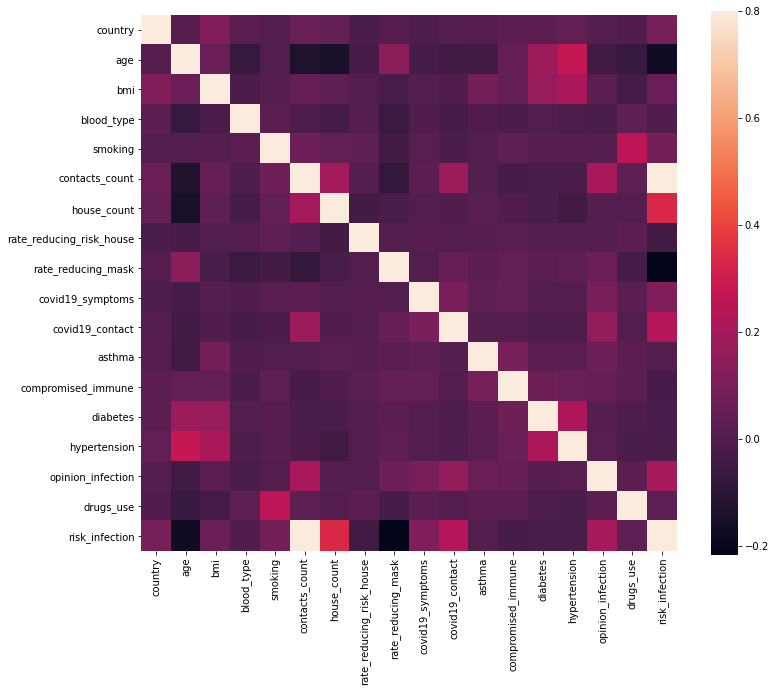

In [45]:
# Correlation matrix
import seaborn as sns

cor = independent_variables.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(cor,vmax = 0.8, square = True)
plt.show()

In [46]:
# We want to know how well does each feature correlate with the dependent variable
corr = df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

#Correlation with the variable covid19_positive
cor_target = (corr["risk_infection"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.0]
relevant_features

country                   0.089782
bmi                       0.058807
smoking                   0.084613
contacts_count            0.888682
house_count               0.335922
text_working              0.513821
rate_government_action    0.004297
covid19_positive          0.073692
covid19_symptoms          0.110243
covid19_contact           0.236475
asthma                    0.002455
opinion_infection         0.202818
risk_infection            1.000000
drugs_use                 0.032567
Name: risk_infection, dtype: float64

In [47]:
independent_variables = df[['risk_infection','country', 'bmi','smoking','contacts_count',
                            'house_count','text_working','rate_government_action','covid19_positive', 
                          'covid19_symptoms', 'covid19_contact', 'asthma', 'opinion_infection', 'drugs_use' ]]

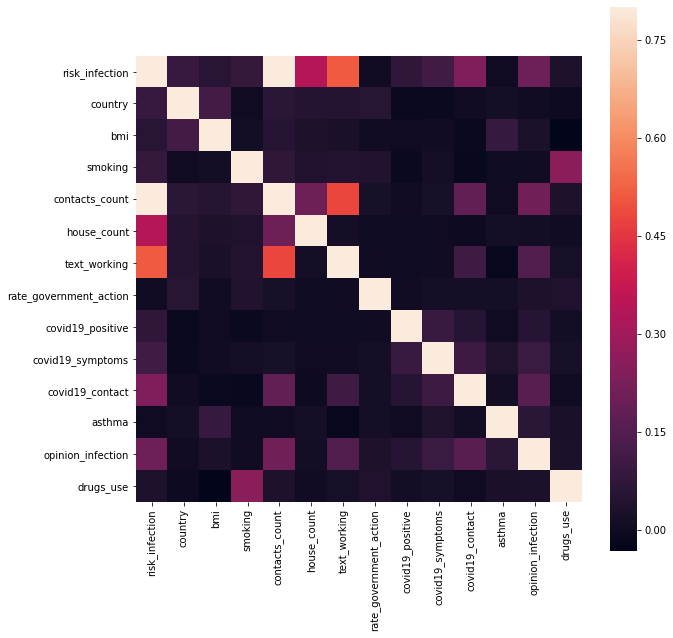

In [48]:
cor = independent_variables.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(cor,vmax = 0.8, square = True)
plt.show()

In [49]:
df.columns

Index(['country', 'sex', 'age', 'bmi', 'blood_type', 'smoking', 'alcohol',
       'contacts_count', 'house_count', 'text_working',
       'rate_government_action', 'rate_reducing_risk_single',
       'rate_reducing_risk_house', 'rate_reducing_mask', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes',
       'hiv_positive', 'hypertension', 'other_chronic', 'opinion_infection',
       'risk_infection', 'drugs_use'],
      dtype='object')

In [50]:
## removing multicollinearity 
from statsmodels.stats import outliers_influence
# create a Python list of feature names
independent_variables = ['age', 'alcohol', 'country', 'bmi', 'smoking', 
       'contacts_count', 'house_count', 'text_working','compromised_immune',
       'rate_government_action',
       'rate_reducing_mask', 'covid19_positive','heart_disease', 'lung_disease', 'diabetes',
       'covid19_symptoms', 'covid19_contact',
       'other_chronic', 'opinion_infection','drugs_use']
# use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['risk_infection']

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
thresh = 2.50
for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix)
for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print("vif :", vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\'at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break
print('Final variables:', independent_variables)

vif : [9.821816596856431, 1.4914670354661475, 9.579037134709742, 12.498785706044496, 1.620705992659151, 3.15233870046112, 4.959975278863018, 6.804910843862267, 1.1607229453494414, 2.0043892190527974, 4.769596789638671, 1.0138327309103794, 1.0746951355398777, 1.0611460448667116, 1.1346654990486102, 1.0450897215518677, 1.1047753005673042, 1.1797380074384525, 4.442897892219805, 1.0940243391866782]
dropping 'bmi'at index: 3
vif : [8.663101276879848, 1.4855663247194126, 8.608830517577678, 1.6166575111588173, 3.1522931047351515, 4.730839885939864, 6.574502317075956, 1.1603634339551738, 1.9933302777938418, 4.732574735992171, 1.0138256289187109, 1.0741517738615658, 1.060390729762348, 1.1227460741155582, 1.044943668112666, 1.1040424746378996, 1.178598778935018, 4.3639510893464495, 1.0936312063039748]
dropping 'age'at index: 0
vif : [1.433632269241428, 7.476255418376812, 1.6078633263044741, 3.120667610560423, 4.658843762177744, 6.382152782309335, 1.1602135243993876, 1.9893970833961803, 4.2003734

In [52]:
## Build the multivariate linear regression model

# create a Python list of feature names

independent_variables = ['alcohol', 'smoking', 'contacts_count', 'compromised_immune',
                         'rate_government_action', 'rate_reducing_mask', 'covid19_positive',
                         'heart_disease', 'lung_disease', 'diabetes', 'covid19_symptoms', 
                         'covid19_contact', 'other_chronic', 'drugs_use']
# use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['risk_infection']

In [53]:
# Split your data set into 80/20 for train/test datasets
import statsmodels.api as sm
from sklearn import metrics 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80,
random_state=1)
# create a fitted model & print the summary
lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())
# make predictions on the testing set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

                                 OLS Regression Results                                
Dep. Variable:         risk_infection   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          4.657e+05
Date:                Mon, 25 May 2020   Prob (F-statistic):                        0.00
Time:                        14:50:22   Log-Likelihood:                     -2.3186e+06
No. Observations:              546234   AIC:                                  4.637e+06
Df Residuals:                  546220   BIC:                                  4.637e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

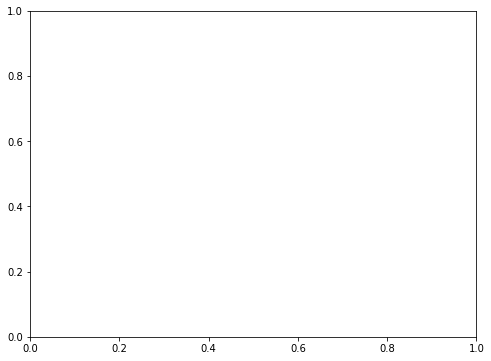

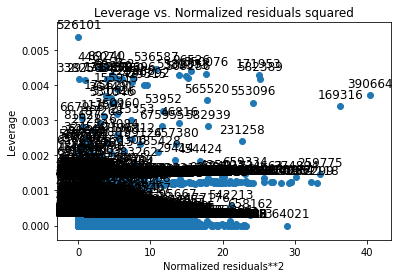

In [54]:
# lets plot the normalized residual vs leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(lm, ax = ax)


In [55]:
# Find outliers #
# Bonferroni outlier test
#test = lm.outlier_test()
#print('Bad data points (bonf(p) < 0.05):')
#print(test[test.icol(2) < 0.05])

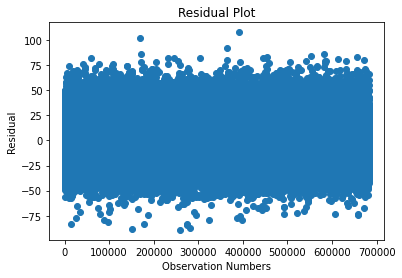

(array([2.70000e+01, 2.86000e+02, 1.08420e+04, 8.29080e+04, 2.35328e+05,
        1.84829e+05, 2.98480e+04, 2.06800e+03, 9.50000e+01, 3.00000e+00]),
 array([-89.15779823, -69.46912265, -49.78044707, -30.09177149,
        -10.40309592,   9.28557966,  28.97425524,  48.66293082,
         68.3516064 ,  88.04028197, 107.72895755]),
 <a list of 10 Patch objects>)

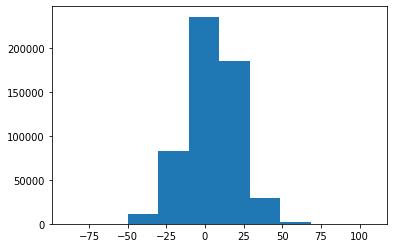

In [56]:
# plot to check homoscedasticity
plt.plot(lm.resid,'o')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Observation Numbers')
plt.show()
plt.hist(lm.resid)

0.9987295343101997

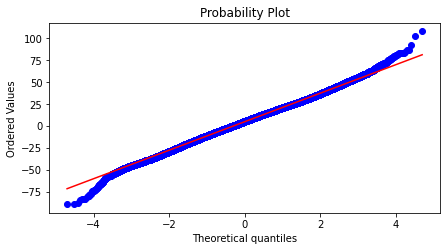

In [57]:
import scipy as sp
fig, ax = plt.subplots(figsize=(7,3.5))
_, (__, ___, r) = sp.stats.probplot(lm.resid, plot=ax, fit=True)
r**2

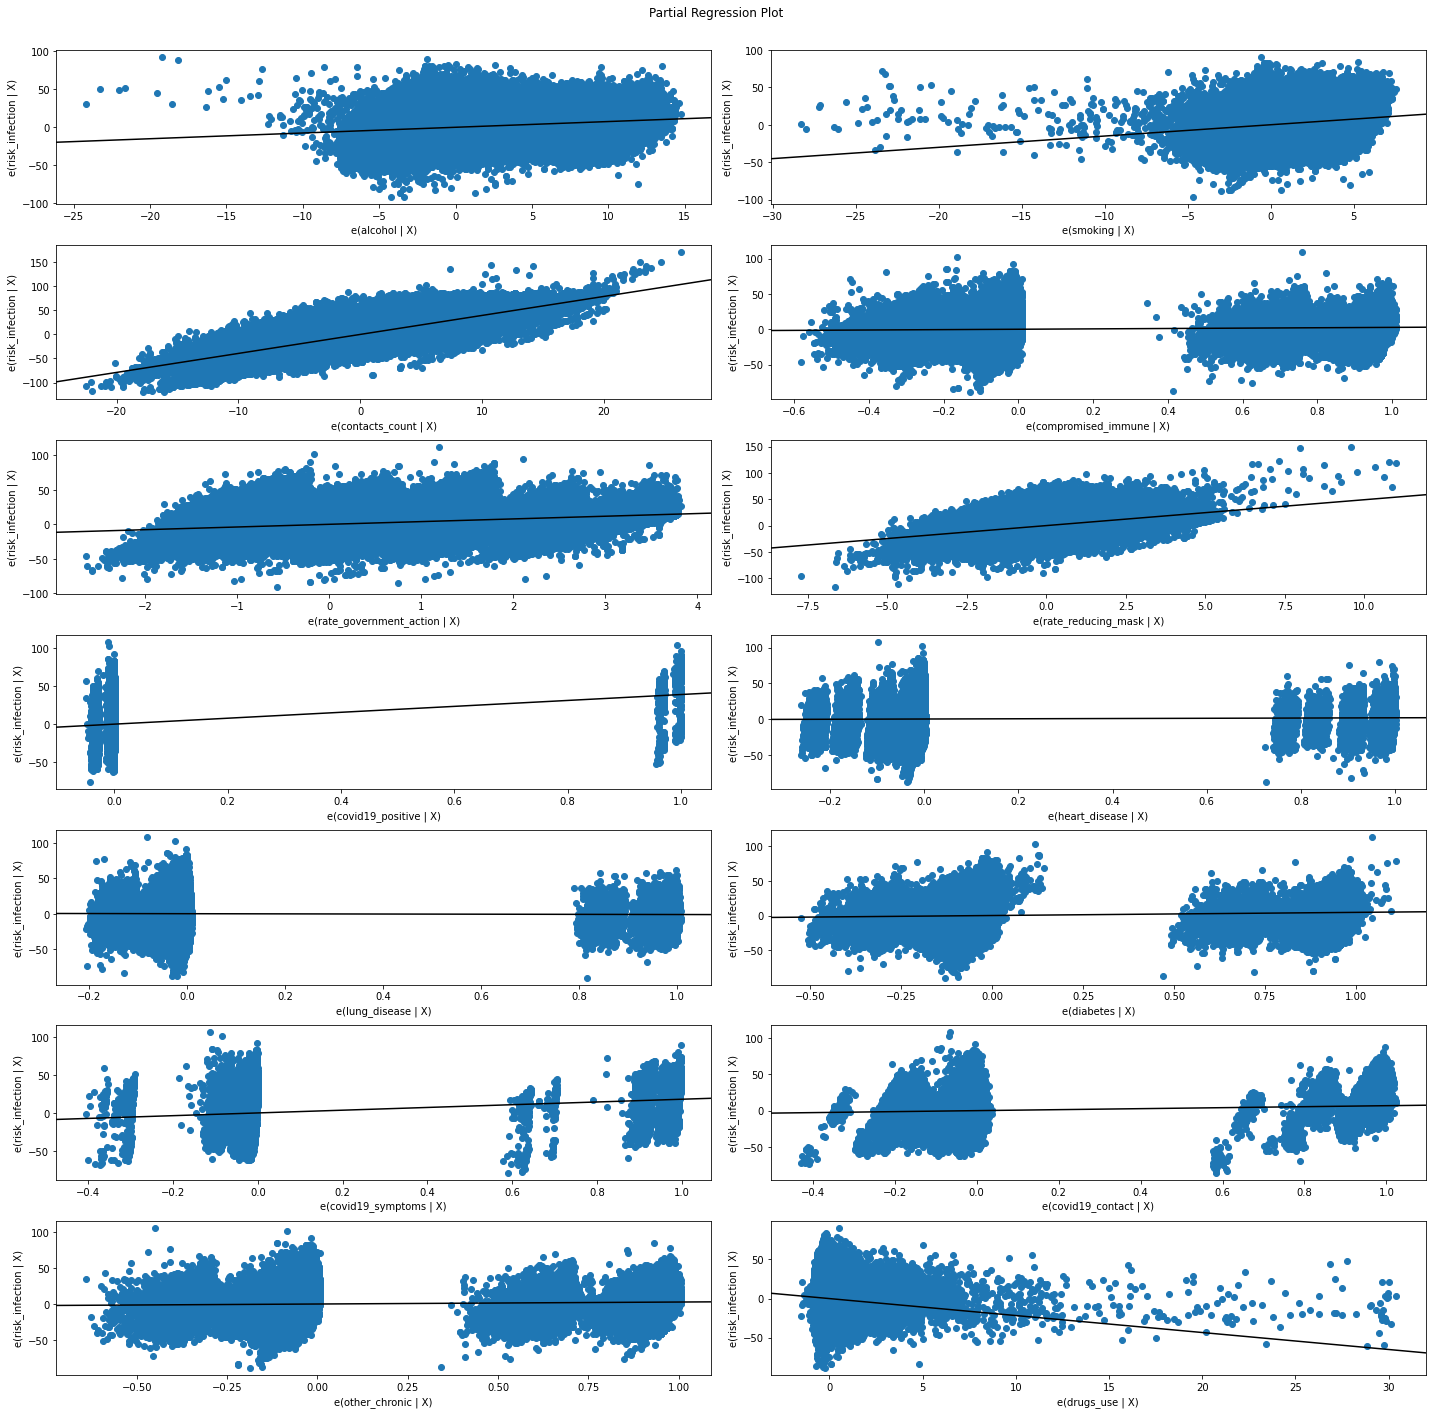

In [58]:
### Linearity checks 

# linearity plots
fig = plt.figure(figsize=(20,20))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)

In [59]:
df.columns

Index(['country', 'sex', 'age', 'bmi', 'blood_type', 'smoking', 'alcohol',
       'contacts_count', 'house_count', 'text_working',
       'rate_government_action', 'rate_reducing_risk_single',
       'rate_reducing_risk_house', 'rate_reducing_mask', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes',
       'hiv_positive', 'hypertension', 'other_chronic', 'opinion_infection',
       'risk_infection', 'drugs_use'],
      dtype='object')

In [60]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80,
random_state=1)
# Ridge regression
ridge = linear_model.Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print("------ Ridge Regression ------")
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Ridge Coef: ", ridge.coef_)

# LASSO regression
lr = linear_model.Lasso(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print("----- LASSO Regression -----")
print("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("LASSO Coef: ", lr.coef_)


------ Ridge Regression ------
Train MAE:  7.366696942405568
Train RMSE:  9.943089931754951
Test MAE:  7.3547106012810115
Test RMSE:  9.926592369930571
Ridge Coef:  [-0.0996818   0.2381157   3.08271936  0.08417944 -0.39392783 -2.97667948
 36.67460933 -0.65987595 -0.91789381 -0.21551149 14.65246852 10.44719014
 -0.39124919 -0.09203123]
----- LASSO Regression -----
Train MAE:  7.367275356074711
Train RMSE:  9.943133590712565
Test MAE:  7.355252579344727
Test RMSE:  9.9263541652136
LASSO Coef:  [-0.0995862   0.23726649  3.08290026  0.05661469 -0.39287128 -2.97588307
 36.06023007 -0.60673213 -0.84287141 -0.20251326 14.61157264 10.42674005
 -0.37333138 -0.08884645]


In [61]:
coeff = pd.DataFrame({'Features':['alcohol', 'smoking', 'contacts_count', 'compromised_immune',
                         'rate_government_action', 'rate_reducing_mask', 'covid19_positive',
                         'heart_disease', 'lung_disease', 'diabetes', 'covid19_symptoms', 
                         'covid19_contact', 'other_chronic', 'drugs_use']})

coeff['Coefficient Estimate Ridge'] = pd.Series(ridge.coef_)

coeff

,Features,Coefficient Estimate Ridge
0,alcohol,-0.099682
1,smoking,0.238116
2,contacts_count,3.082719
3,compromised_immune,0.084179
4,rate_government_action,-0.393928
5,rate_reducing_mask,-2.976679
6,covid19_positive,36.674609
7,heart_disease,-0.659876
8,lung_disease,-0.917894
9,diabetes,-0.215511


In [62]:
coeff = pd.DataFrame({'Features':['alcohol', 'smoking', 'contacts_count', 'compromised_immune',
                         'rate_government_action', 'rate_reducing_mask', 'covid19_positive',
                         'heart_disease', 'lung_disease', 'diabetes', 'covid19_symptoms', 
                         'covid19_contact', 'other_chronic', 'drugs_use']})

coeff['Coefficient Estimate LASSO'] = pd.Series(lr.coef_)

coeff

,Features,Coefficient Estimate LASSO
0,alcohol,-0.099586
1,smoking,0.237266
2,contacts_count,3.082900
3,compromised_immune,0.056615
4,rate_government_action,-0.392871
5,rate_reducing_mask,-2.975883
6,covid19_positive,36.060230
7,heart_disease,-0.606732
8,lung_disease,-0.842871
9,diabetes,-0.202513


In [63]:
attributes = ['alcohol', 'smoking', 'contacts_count',
                         'rate_government_action', 'rate_reducing_mask', 'covid19_positive',
                         'covid19_symptoms', 'covid19_contact', 'other_chronic', 'drugs_use']
df['risk_infection'] = pd.cut(df.risk_infection,bins=[0,34,67,100],labels=['Low','Medium','High'])
df['risk_infection']
label_encoders = dict()
column2encode = ['risk_infection']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
#attributes = [col for col in df.columns if col != 'risk_infection']
X = df[attributes].values
y = df['risk_infection']
#scaler = preprocessing.StandardScaler().fit(X)

In [64]:
#Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [65]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [66]:
#logistic regression model training and evaluation

from sklearn.linear_model import LogisticRegression
# l1 regularization gives better results
lr = LogisticRegression(penalty='l1', C=10, random_state=0)
lr.fit(X_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred = lr.predict(X_test)
y_pred_tr = lr.predict(X_train)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
confusion_matrix(y_train, y_pred_tr)
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 0.7968574447385214
Train F1-score [0.87628312 0.64948365 0.80257081]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88    144429
           1       0.82      0.54      0.65    105642
           2       0.75      0.86      0.80    227884

    accuracy                           0.80    477955
   macro avg       0.81      0.76      0.78    477955
weighted avg       0.80      0.80      0.79    477955


Test Accuracy 0.7969907927240063
Test F1-score [0.87596244 0.64989803 0.80278758]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     61898
           1       0.82      0.54      0.65     45275
           2       0.75      0.86      0.80     97665

    accuracy                           0.80    204838
   macro avg       0.81      0.76      0.78    204838
weighted avg       0.80      0.80      0.79    204838



array([[54438,    58,  7402],
       [   40, 24378, 20857],
       [ 7917,  5310, 84438]], dtype=int64)

Text(0.5, 24.0, 'Predicted label')

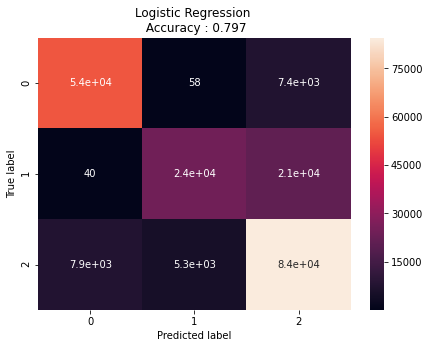

In [69]:
import seaborn as sns
confusion = confusion_matrix(y_test, y_pred)
df1 = pd.DataFrame(confusion)
plt.figure(figsize = (7, 5))
sns.heatmap(df1, annot = True)
plt.title('Logistic Regression \n Accuracy : {0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [70]:
from sklearn.metrics import precision_score
print('Micro-average precision = {:.2f}(treat instances equally)'.format(precision_score(y_test,y_pred, average = 'micro')))
print('Macro-average precision = {:.2f}(treat classes equally)'.format(precision_score(y_test,y_pred, average = 'macro')))

print('Micro-average f1 = {:.2f}(treat instances equally)'.format(f1_score(y_test,y_pred, average = 'micro')))
print('Macro-average f1 = {:.2f}(treat classes equally)'.format(f1_score(y_test,y_pred, average = 'macro')))


Micro-average precision = 0.80(treat instances equally)
Macro-average precision = 0.81(treat classes equally)
Micro-average f1 = 0.80(treat instances equally)
Macro-average f1 = 0.78(treat classes equally)


In [72]:
# Decision tree classification
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import interp
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=2, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)

# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
print(scores)

[0.83279285 0.83107726 0.83157586 0.83316596 0.83410399 0.83291139
 0.83109112 0.83142588 0.83201172 0.83179897]


In [73]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)
      


In [74]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
confusion_matrix(y_train, y_pred_tr)
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 0.8322519902501282
Train F1-score [0.87418187 0.79105708 0.82672471]
              precision    recall  f1-score   support

           0       0.92      0.84      0.87    144429
           1       0.76      0.82      0.79    105642
           2       0.82      0.83      0.83    227884

    accuracy                           0.83    477955
   macro avg       0.83      0.83      0.83    477955
weighted avg       0.84      0.83      0.83    477955


Test Accuracy 0.8314814634003457
Test F1-score [0.87225332 0.7914162  0.82608607]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87     61898
           1       0.76      0.82      0.79     45275
           2       0.82      0.83      0.83     97665

    accuracy                           0.83    204838
   macro avg       0.83      0.83      0.83    204838
weighted avg       0.83      0.83      0.83    204838



array([[51664,   219, 10015],
       [    0, 37193,  8082],
       [ 4899, 11304, 81462]], dtype=int64)

Text(0.5, 24.0, 'Predicted label')

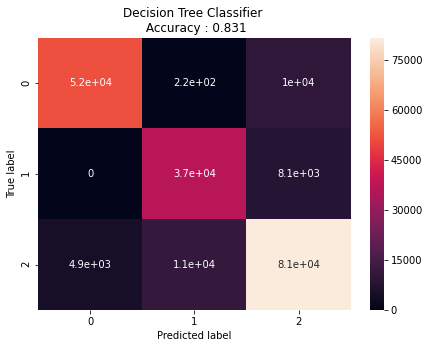

In [75]:
import seaborn as sns
confusion = confusion_matrix(y_test, y_pred)
df1 = pd.DataFrame(confusion)
plt.figure(figsize = (7, 5))
sns.heatmap(df1, annot = True)
plt.title('Decision Tree Classifier \n Accuracy : {0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [76]:
from sklearn.metrics import precision_score
print('Micro-average precision = {:.2f}(treat instances equally)'.format(precision_score(y_test,y_pred, average = 'micro')))
print('Macro-average precision = {:.2f}(treat classes equally)'.format(precision_score(y_test,y_pred, average = 'macro')))

print('Micro-average f1 = {:.2f}(treat instances equally)'.format(f1_score(y_test,y_pred, average = 'micro')))
print('Macro-average f1 = {:.2f}(treat classes equally)'.format(f1_score(y_test,y_pred, average = 'macro')))


Micro-average precision = 0.83(treat instances equally)
Macro-average precision = 0.83(treat classes equally)
Micro-average f1 = 0.83(treat instances equally)
Macro-average f1 = 0.83(treat classes equally)


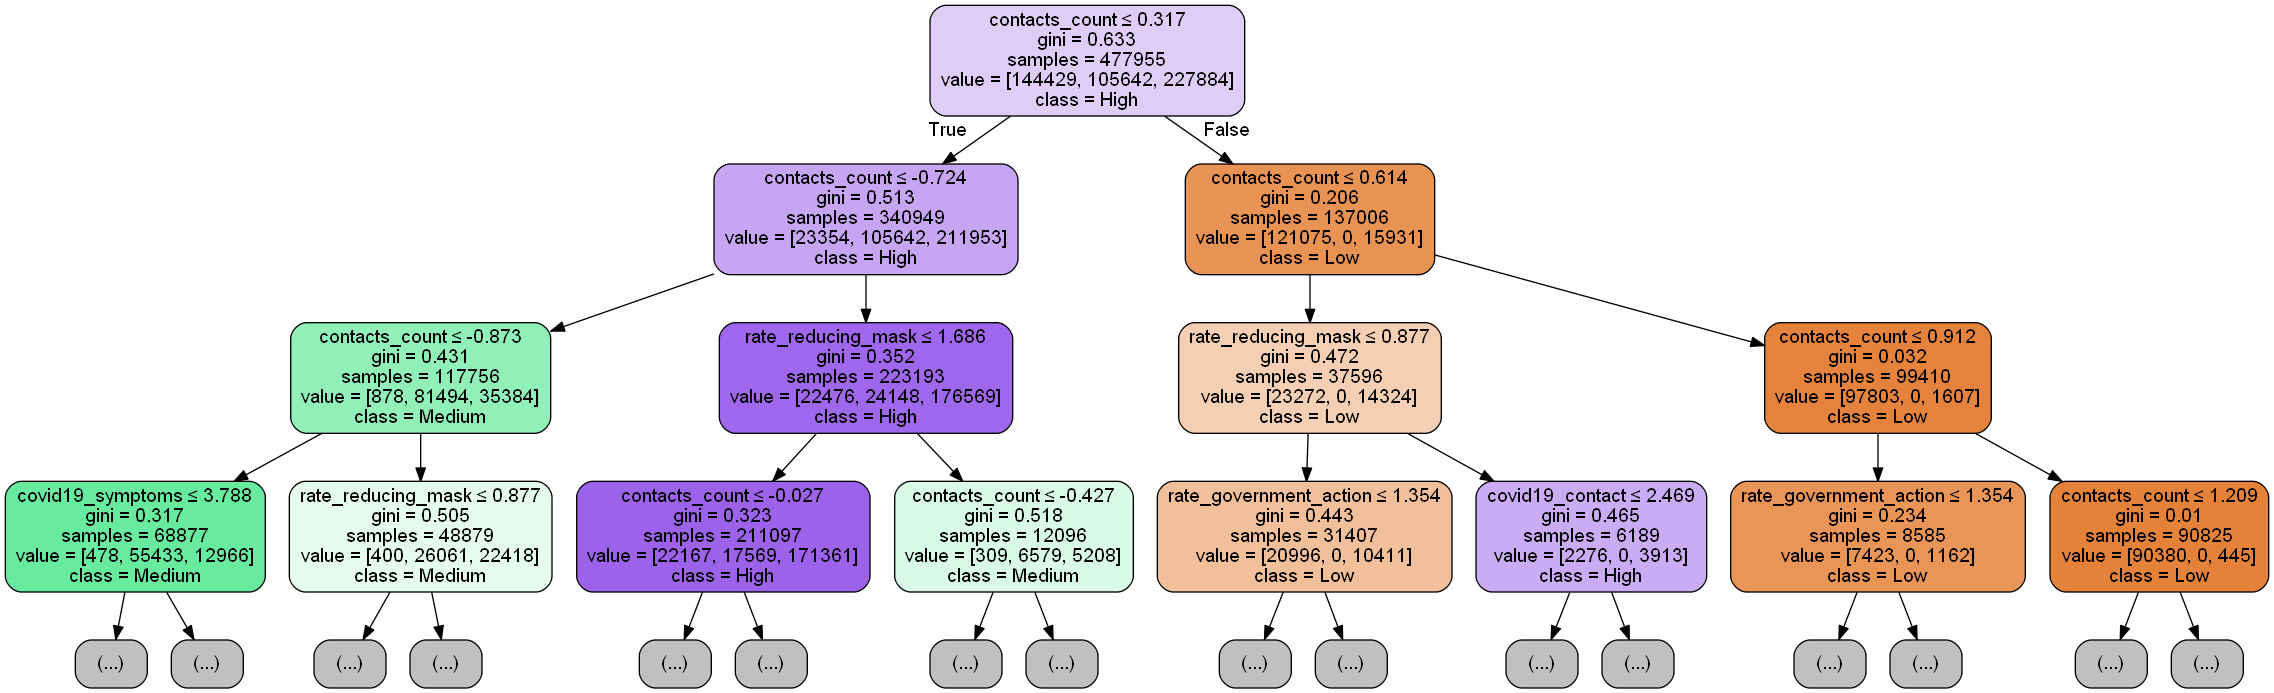

<Figure size 864x864 with 0 Axes>

In [77]:
import pydotplus
from sklearn import tree
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['Low', 'Medium', 'High'],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)
plt.figure(figsize = (12,12))
Image(graph.create_png())

In [78]:
for col, imp in zip(attributes, clf.feature_importances_):
    print(col, imp)

alcohol 1.1732221419224509e-06
smoking 0.0
contacts_count 0.8928388032543301
rate_government_action 0.013205457141753463
rate_reducing_mask 0.05887386821682919
covid19_positive 0.00022114188215815786
covid19_symptoms 0.009069805268530219
covid19_contact 0.02578975101425693
other_chronic 0.0
drugs_use 0.0


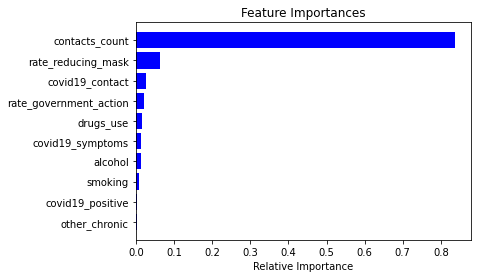

In [92]:
attributes = ['alcohol', 'smoking', 'contacts_count',
                         'rate_government_action', 'rate_reducing_mask', 'covid19_positive',
                         'covid19_symptoms', 'covid19_contact', 'other_chronic', 'drugs_use']

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [attributes[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [81]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [82]:
from sklearn.ensemble import RandomForestClassifier
param_list = {'max_depth': [None] + list(np.arange(2, 50)),
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10, 15, 20],
              'criterion': ['gini', 'entropy'],
             }

clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, class_weight=None)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=10)
random_search.fit(X_train, y_train)
report(random_search.cv_results_, n_top=3)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model with rank: 1
Mean validation score: 0.837 (std: 0.000)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 17, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.837 (std: 0.000)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': 37, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.837 (std: 0.000)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': 21, 'criterion': 'entropy'}



In [83]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

In [84]:
clf = random_search.best_estimator_

y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

In [85]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
confusion_matrix(y_train, y_pred_tr)
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Train Accuracy 0.8493540186837673
Train F1-score [0.89159329 0.80360828 0.84474323]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89    144429
           1       0.80      0.81      0.80    105642
           2       0.83      0.86      0.84    227884

    accuracy                           0.85    477955
   macro avg       0.85      0.84      0.85    477955
weighted avg       0.85      0.85      0.85    477955


Test Accuracy 0.8372128218396977
Test F1-score [0.88057693 0.7906844  0.83226874]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88     61898
           1       0.79      0.80      0.79     45275
           2       0.82      0.84      0.83     97665

    accuracy                           0.84    204838
   macro avg       0.84      0.83      0.83    204838
weighted avg       0.84      0.84      0.84    204838



array([[52994,    98,  8806],
       [    3, 36022,  9250],
       [ 5467,  9721, 82477]], dtype=int64)

Text(0.5, 24.0, 'Predicted label')

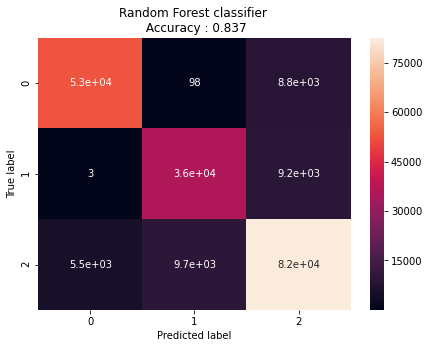

In [86]:
import seaborn as sns
confusion = confusion_matrix(y_test, y_pred)
df1 = pd.DataFrame(confusion)
plt.figure(figsize = (7, 5))
sns.heatmap(df1, annot = True)
plt.title('Random Forest classifier \n Accuracy : {0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [87]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

confusion_matrix(y_test, y_predict)

array([[52185,   132,  9581],
       [   79, 33349, 11847],
       [ 6763, 10335, 80567]], dtype=int64)

Text(0.5, 24.0, 'Predicted label')

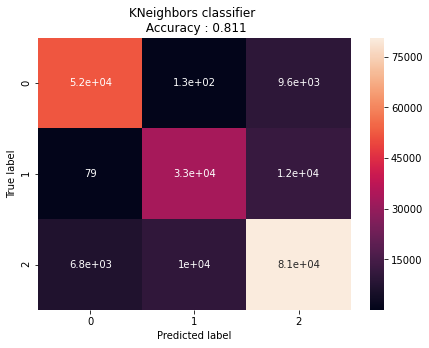

In [88]:
import seaborn as sns
confusion = confusion_matrix(y_test, y_predict)
df1 = pd.DataFrame(confusion)
plt.figure(figsize = (7, 5))
sns.heatmap(df1, annot = True)
plt.title('KNeighbors classifier \n Accuracy : {0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [89]:
#y_pred = model.predict(X_test)
y_pred_tr = model.predict(X_train)

In [90]:
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_tr))
print('Train F1-score %s' % f1_score(y_train, y_pred_tr, average=None))
print(classification_report(y_train, y_pred_tr))
confusion_matrix(y_train, y_pred_tr)
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_predict))
print('Test F1-score %s' % f1_score(y_test, y_predict, average=None))
print(classification_report(y_test, y_predict))
confusion_matrix(y_test, y_predict)

Train Accuracy 0.8464583485893024
Train F1-score [0.89012722 0.79432645 0.84328328]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89    144429
           1       0.80      0.78      0.79    105642
           2       0.83      0.86      0.84    227884

    accuracy                           0.85    477955
   macro avg       0.85      0.84      0.84    477955
weighted avg       0.85      0.85      0.85    477955


Test Accuracy 0.8108895810347689
Test F1-score [0.86309696 0.74865026 0.80704197]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     61898
           1       0.76      0.74      0.75     45275
           2       0.79      0.82      0.81     97665

    accuracy                           0.81    204838
   macro avg       0.81      0.80      0.81    204838
weighted avg       0.81      0.81      0.81    204838



array([[52185,   132,  9581],
       [   79, 33349, 11847],
       [ 6763, 10335, 80567]], dtype=int64)

In [91]:
print('Micro-average precision = {:.2f}(treat instances equally)'.format(precision_score(y_test,y_predict, average = 'micro')))
print('Macro-average precision = {:.2f}(treat classes equally)'.format(precision_score(y_test,y_predict, average = 'macro')))

print('Micro-average f1 = {:.2f}(treat instances equally)'.format(f1_score(y_test,y_predict, average = 'micro')))
print('Macro-average f1 = {:.2f}(treat classes equally)'.format(f1_score(y_test,y_predict, average = 'macro')))

Micro-average precision = 0.81(treat instances equally)
Macro-average precision = 0.81(treat classes equally)
Micro-average f1 = 0.81(treat instances equally)
Macro-average f1 = 0.81(treat classes equally)
